# Rajneesh Sharma

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as sv
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('50_Startups.csv')

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df1=df.rename({'R&D Spend':'RD','Marketing Spend':'Marketing'},axis=1)

In [5]:
df1.head()

,RD,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RD              50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df1.isnull().sum()

RD                0
Administration    0
Marketing         0
State             0
Profit            0
dtype: int64

In [8]:
df1.corr()

,RD,Administration,Marketing,Profit
RD,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
df1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [10]:
df1.describe()

,RD,Administration,Marketing,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


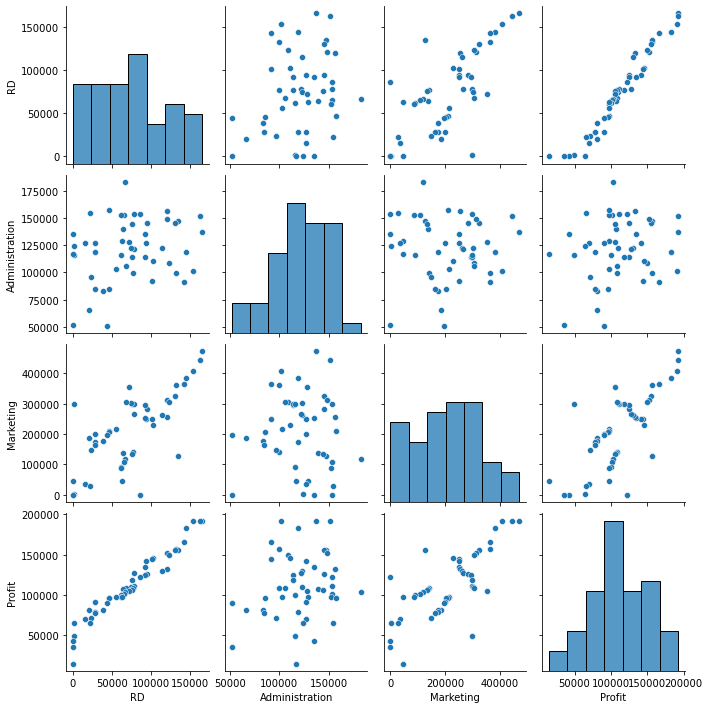

In [11]:
sns.pairplot(df1)

In [12]:
# Model Building
import statsmodels.formula.api as smf
model=smf.ols('Profit~RD+Administration+Marketing',data=df1).fit()

model

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        19:59:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
model1=smf.ols('Profit~RD',data=df1).fit()

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           4.53e-30
Time:                        19:59:31   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD                 0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
model2=smf.ols('Profit~Marketing',data=df1).fit()

In [17]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           4.38e-10
Time:                        19:59:32   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#model Validation (collinearity check)

In [19]:
rsq_rd=smf.ols('RD~Administration+Marketing',data=df1).fit().rsquared
vif_rd=1/(1-rsq_rd)
rsq_mk=smf.ols('Marketing~RD+Administration',data=df1).fit().rsquared
vif_mk=1/(1-rsq_mk)
rsq_ad=smf.ols('Administration~RD+Marketing',data=df1).fit().rsquared
vif_ad=1/(1-rsq_ad)

# making DataFrame
data1={'variable':['RD','Administration','Marketing'],'vif':[vif_rd,vif_ad,vif_mk]}
vif_df=pd.DataFrame(data1)
vif_df

,variable,vif
0,RD,2.468903
1,Administration,1.175091
2,Marketing,2.326773


In [20]:
import matplotlib.pyplot as plt

In [21]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

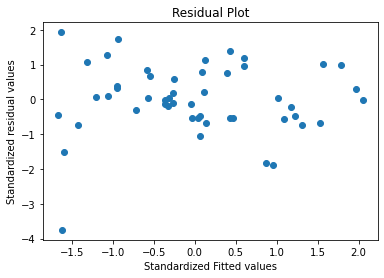

In [22]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

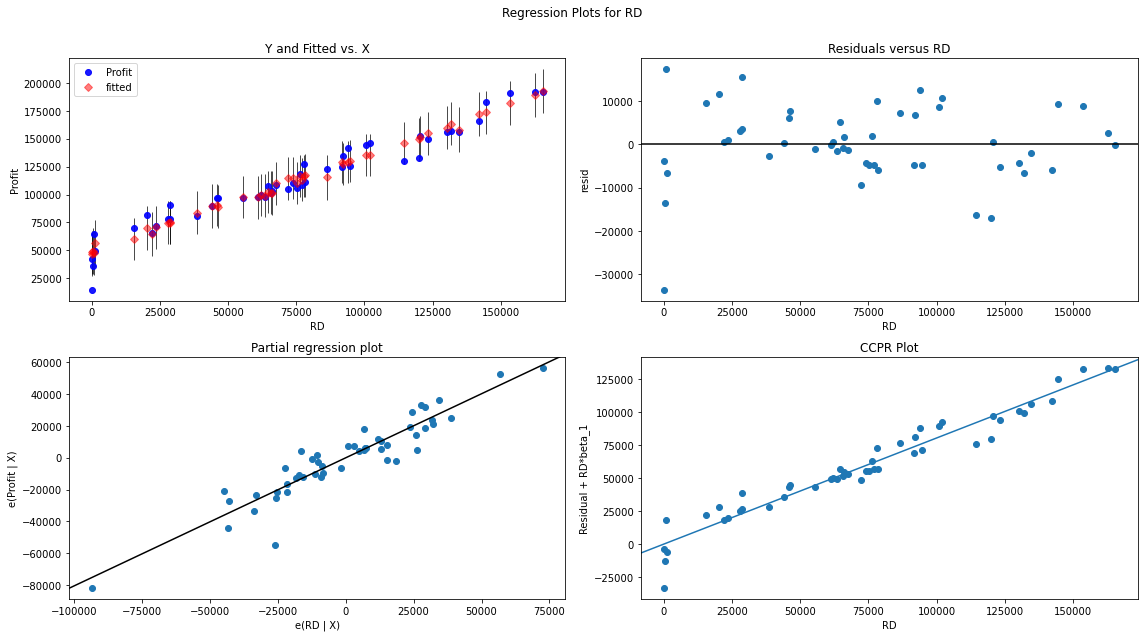

In [23]:
import statsmodels.api as sm
fig=plt.figure(figsize=(16,9))
fig=sm.graphics.plot_regress_exog(model,'RD',fig=fig)

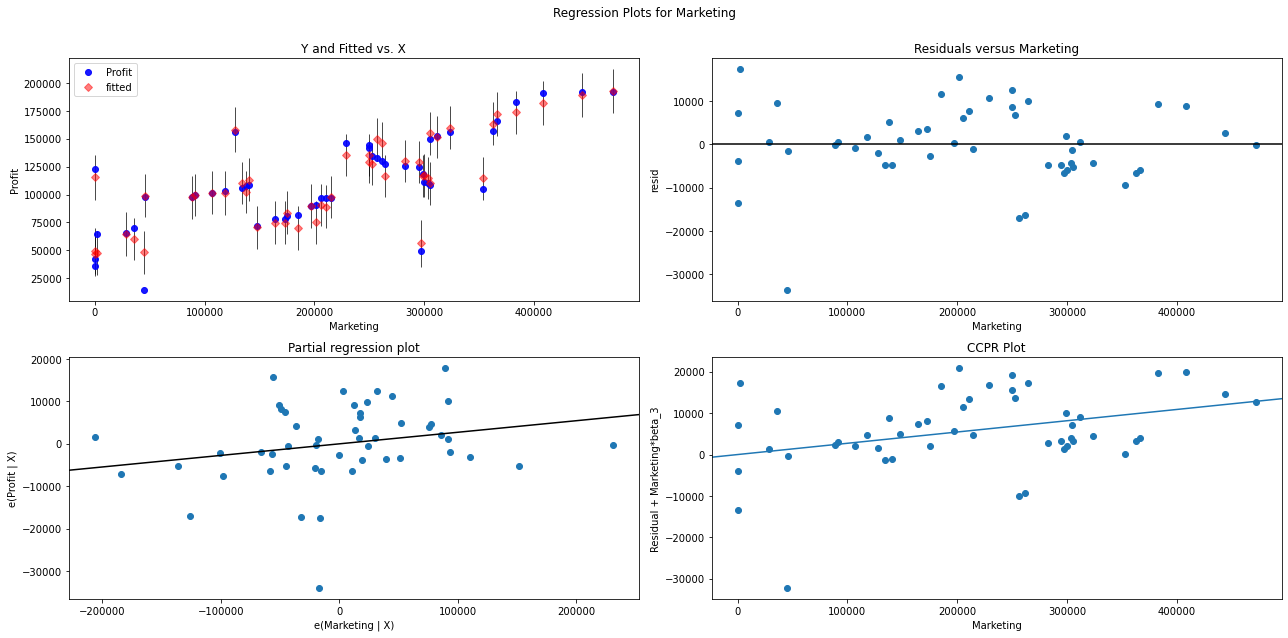

In [24]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(model,'Marketing',fig=fig)

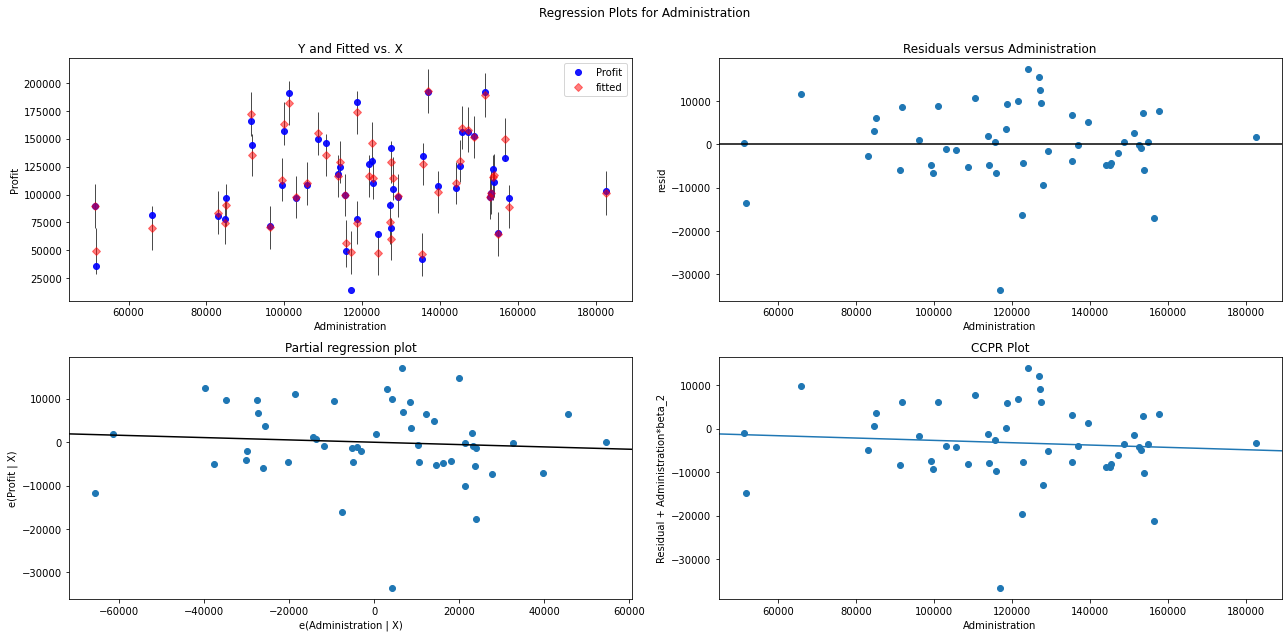

In [25]:
fig=plt.figure(figsize=(18,9))
fig=sm.graphics.plot_regress_exog(model,'Administration',fig=fig)

# Cook's Distance

In [26]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [27]:
import numpy as np

Text(0, 0.5, 'Cooks Distance')

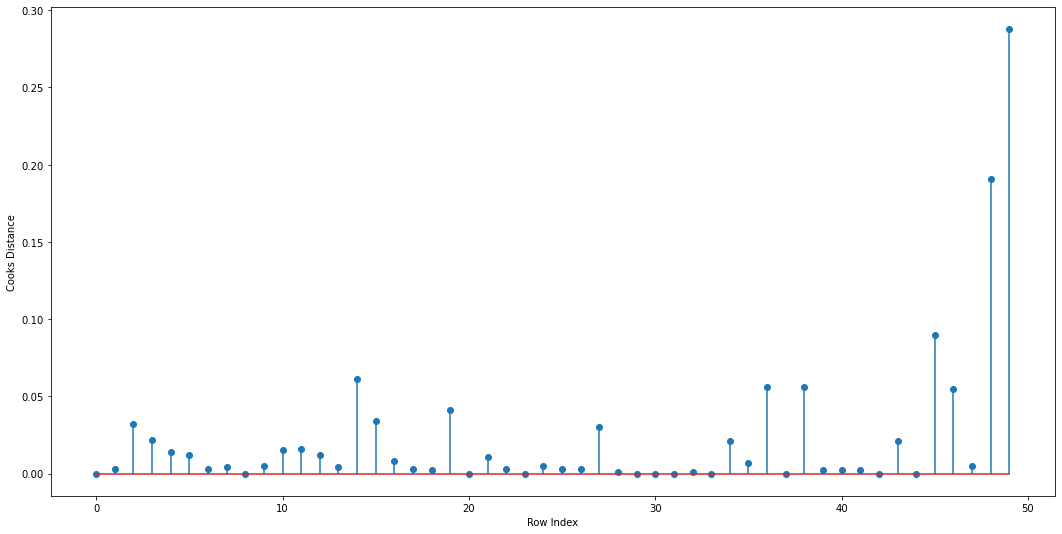

In [28]:
fig=plt.figure(figsize=(18,9))
plt.stem(np.arange(len(df)),np.round(c,3))
plt.xlabel("Row Index")
plt.ylabel("Cooks Distance")

In [29]:
np.argmax(c),np.max(c)

(49, 0.2880822927543267)

In [30]:
df[df.index.isin([49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [31]:
df_new=df.copy()
df_new

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [32]:
df_new1=df_new.drop(df_new.index[49],axis=0).reset_index(drop=True)
df_new1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [33]:
final_model=smf.ols('Profit~Administration+RD+Marketing',data=df1).fit()

In [34]:
final_model.rsquared

0.9507459940683246

In [35]:
# model prediction
new_data=pd.DataFrame({'RD':3000,'Administration':4000,'Marketing':50000},index=[0])

In [36]:
new_data

,RD,Administration,Marketing
0,3000,4000,50000


In [37]:
final_model.predict(new_data)

0    53793.477506
dtype: float64

In [38]:
pre_y=final_model.predict(df1)
pre_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111


In [39]:
dt={'pred_model':['model','final_model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(dt)

In [40]:
table

,pred_model,Rsquared
0,model,0.950746
1,final_model,0.950746


# Q2. for ToyotaCorolla dataset

In [41]:
import pandas as pd

In [42]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')

In [43]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [44]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [45]:
toyota.isnull().sum()

Id                  0
Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [46]:
toyota1=pd.concat([toyota.iloc[:,2:4],toyota.iloc[:,6:7],toyota.iloc[:,8:9],toyota.iloc[:,12:14],toyota.iloc[:,15:18]],axis=1)

In [47]:
toyota1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [48]:
toyota2=toyota1.rename({'Age_08_04':'Age','Quarterly_Tax':'Tax'},axis=1)

In [49]:
toyota2

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [50]:
toyota2[toyota2.duplicated()]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [51]:
toyota3=toyota2.drop_duplicates().reset_index(drop=True)

In [52]:
toyota3

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [53]:
toyota3.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [54]:
toyota3.corr()

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
Age,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
Doors,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
Gears,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
Tax,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


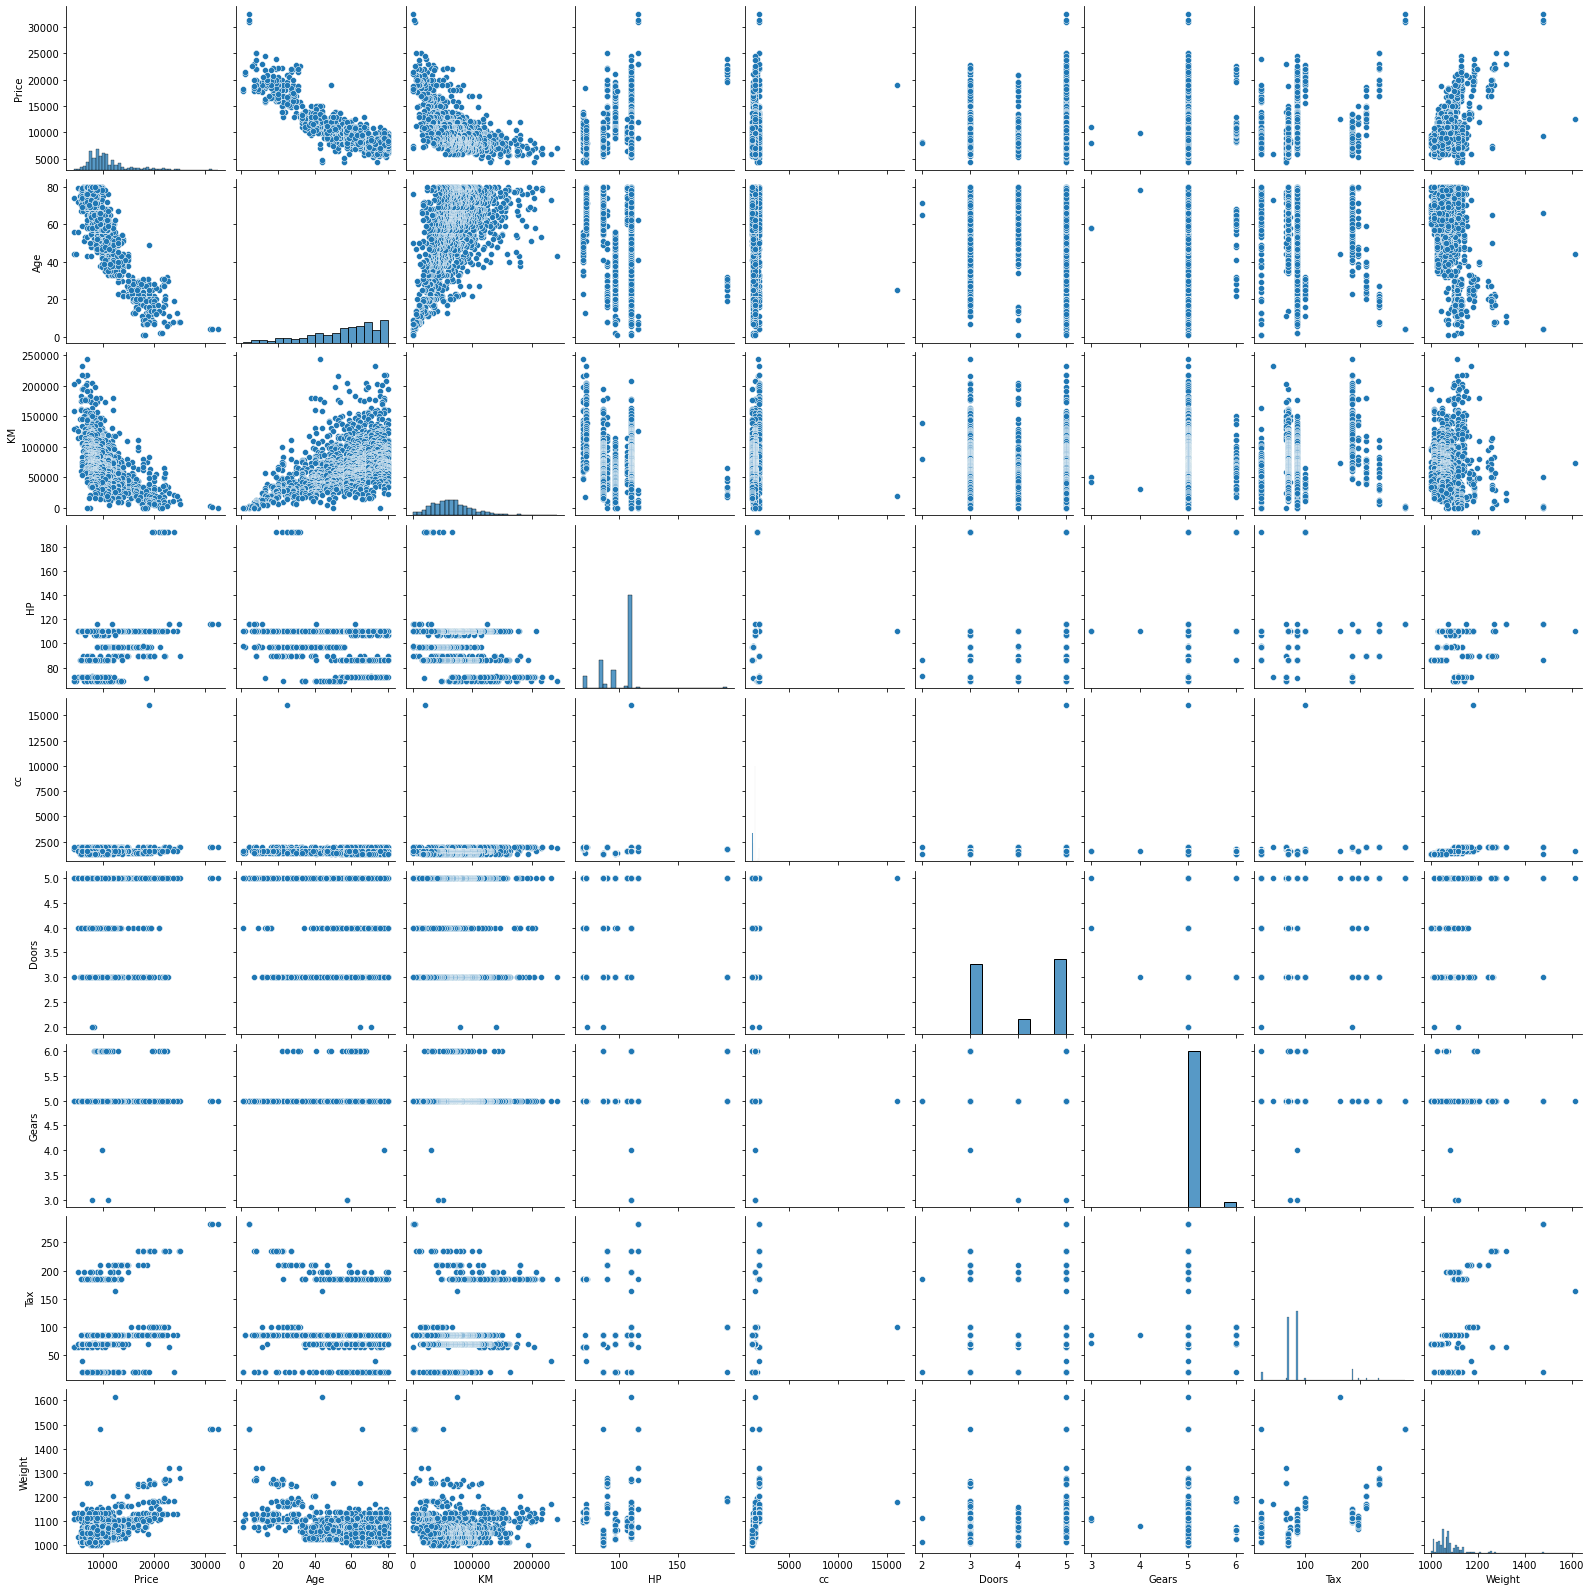

In [55]:
sns.pairplot(toyota3)

In [56]:
# Model Building
model=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Tax+Weight',data=toyota3).fit()

In [57]:
model.params

Intercept   -5472.540368
Age          -121.713891
KM             -0.020737
HP             31.584612
cc             -0.118558
Doors          -0.920189
Gears         597.715894
Tax             3.858805
Weight         16.855470
dtype: float64

In [58]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:59:47   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears        597.7159    196.969      3.035      0.002     211.335     984.097
Tax            3.8588      1.311      2.944      0.003       1.288       6.430
Weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
model1=smf.ols('Price~cc+Doors',data=toyota3).fit()

In [60]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           2.55e-15
Time:                        19:59:47   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation Techniques

In [61]:
rsq_age=smf.ols('Age~KM+HP+cc+Doors+Gears+Tax+Weight',data=toyota3).fit().rsquared
vif_age=1/(1-rsq_age)
rsq_KM=smf.ols('KM~Age+HP+cc+Doors+Gears+Tax+Weight',data=toyota3).fit().rsquared
vif_KM=1/(1-rsq_KM)
rsq_HP=smf.ols('HP~Age+KM+cc+Doors+Gears+Tax+Weight',data=toyota3).fit().rsquared
vif_HP=1/(1-rsq_HP)
rsq_cc=smf.ols('cc~Age+KM+Doors+Gears+Tax+Weight+HP',data=toyota3).fit().rsquared
vif_cc=1/(1-rsq_cc)
rsq_Doors=smf.ols('Doors~cc+Age+KM+Gears+Tax+Weight+HP',data=toyota3).fit().rsquared
vif_Doors=1/(1-rsq_Doors)
rsq_Gears=smf.ols('Gears~Doors+cc+Age+KM+Tax+Weight+HP',data=toyota3).fit().rsquared
vif_Gears=1/(1-rsq_Gears)
rsq_Tax=smf.ols("Tax~Gears+Doors+cc+Age+KM+Weight+HP",data=toyota3).fit().rsquared
vif_Tax=1/(1-rsq_Tax)
rsq_Weight=smf.ols('Weight~Age+KM+HP+Gears+Tax+cc+Gears',data=toyota3).fit().rsquared
vif_wt=1/(1-rsq_Weight)

# Making DataFrame
df={'Variable':['Age','KM','HP','cc','Doors','Gears','Tax','Weight'],
    'VIF':[vif_age,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Tax,vif_wt]}
vif_df=pd.DataFrame(df)
vif_df

,Variable,VIF
0,Age,1.876236
1,KM,1.757178
2,HP,1.419180
3,cc,1.163470
4,Doors,1.155890
5,Gears,1.098843
6,Tax,2.295375
7,Weight,2.330026


C:\Users\Rajneesh Sharma\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


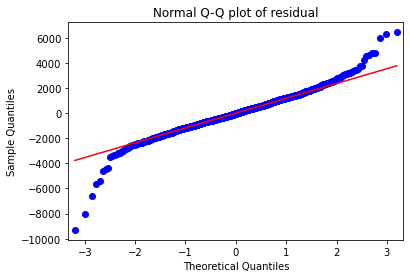

In [62]:
# Residual Analysis
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot of residual')
plt.show()

In [63]:
# outlier Detection
list(np.where(model.resid>5000))

[array([109, 146, 522], dtype=int64)]

In [64]:
list(np.where(model.resid<-5000))

[array([190, 191, 220, 600, 959], dtype=int64)]

In [65]:
# Test for Homoscedasticity or Heteroscedasticity
def standard_values(vals): return(vals-vals.mean())/vals.std()

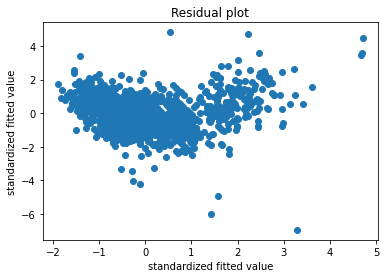

In [66]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual plot')
plt.xlabel('standardized fitted value')
plt.ylabel('standardized fitted value')
plt.show()

In [67]:
# Test for errors or Residuals
# using residual Regration plots code graphics.plot_regress_exog(model,'x',fig)
#exog=x-variable & endog= y-variable

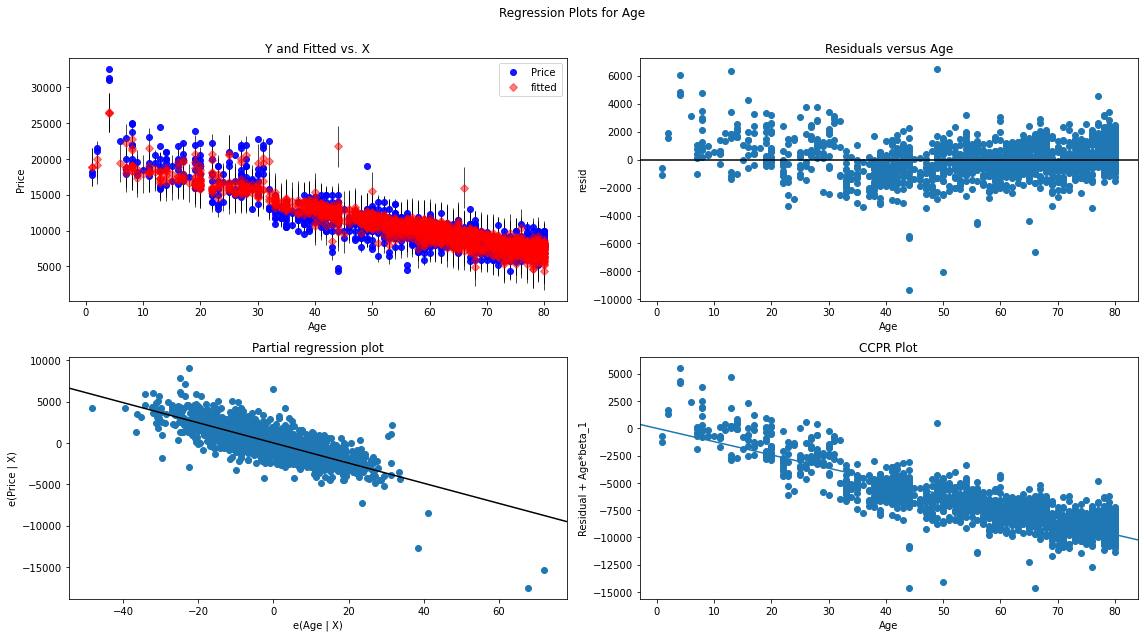

In [68]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'Age',fig=fig)
plt.show()

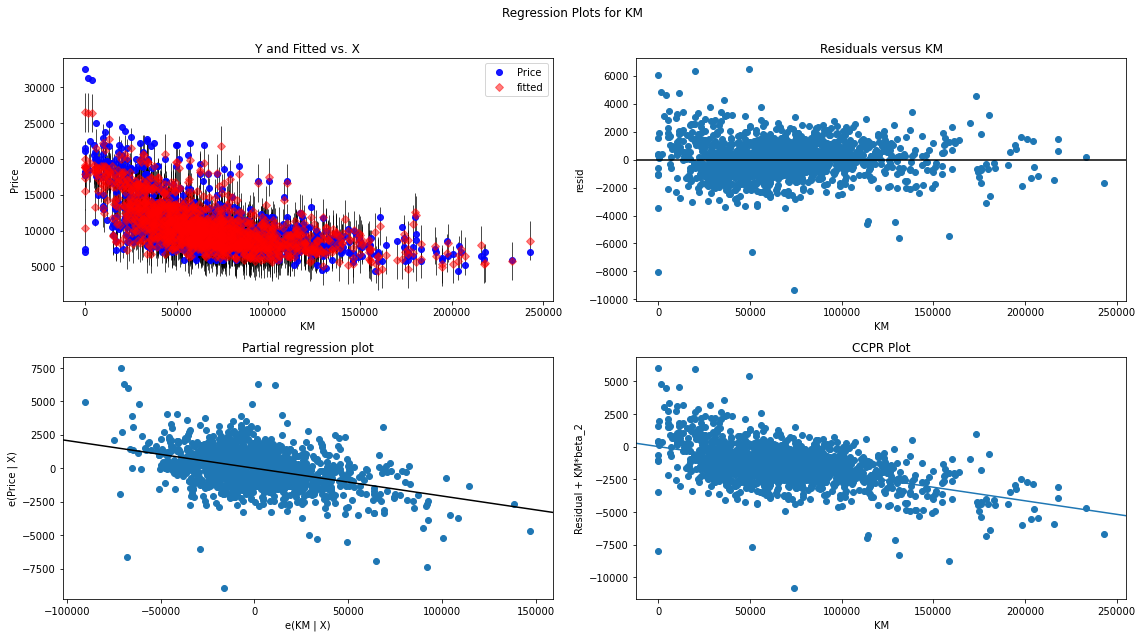

In [69]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

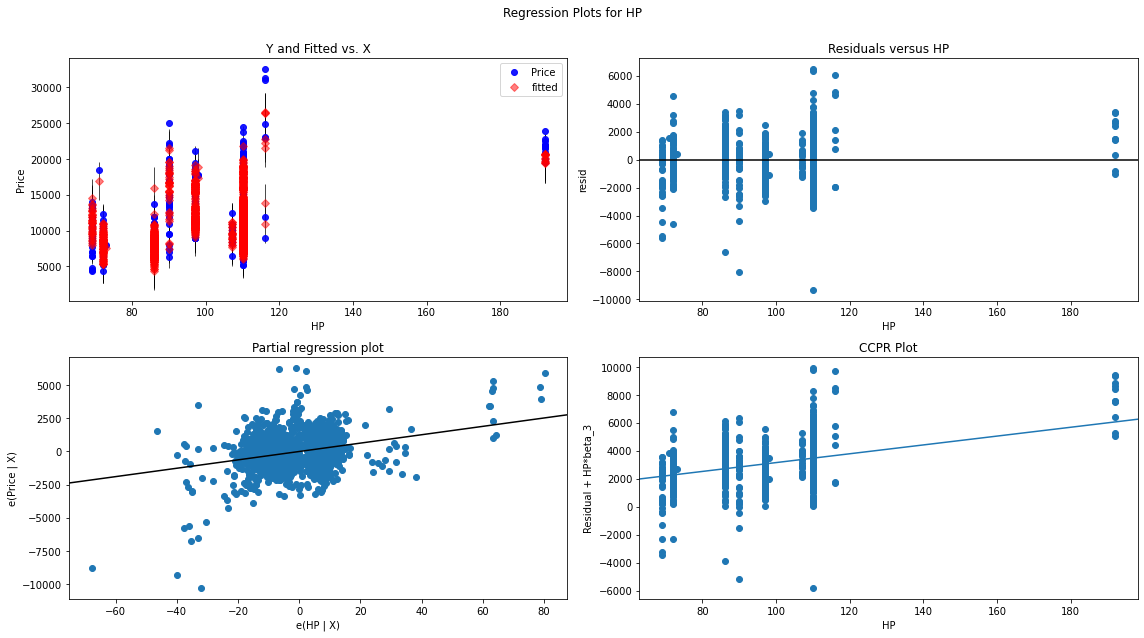

In [70]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

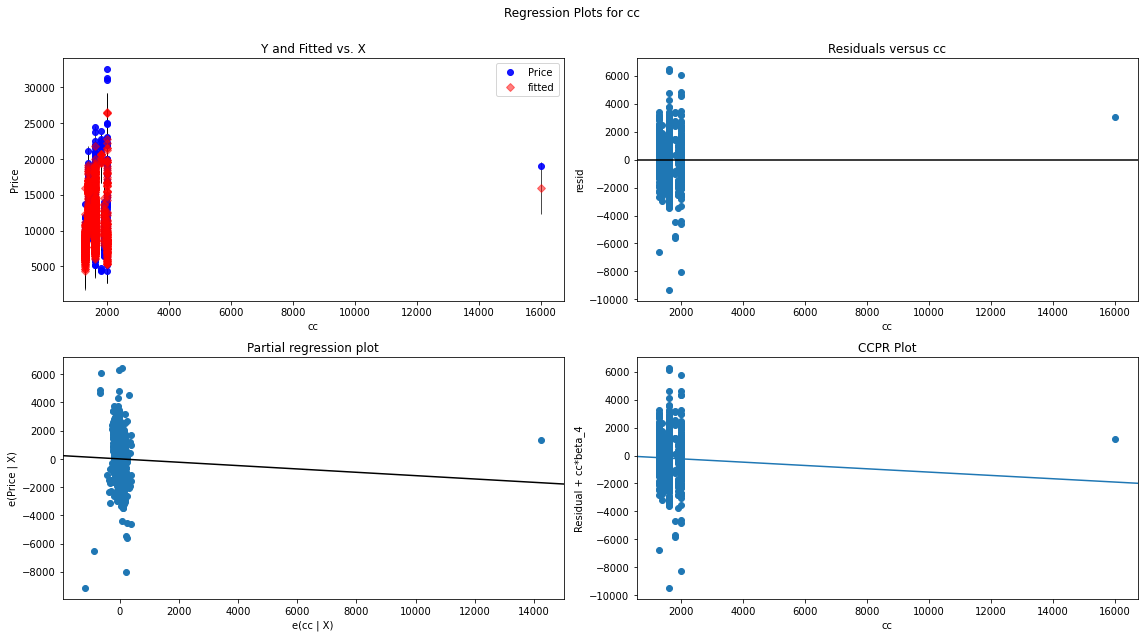

In [71]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

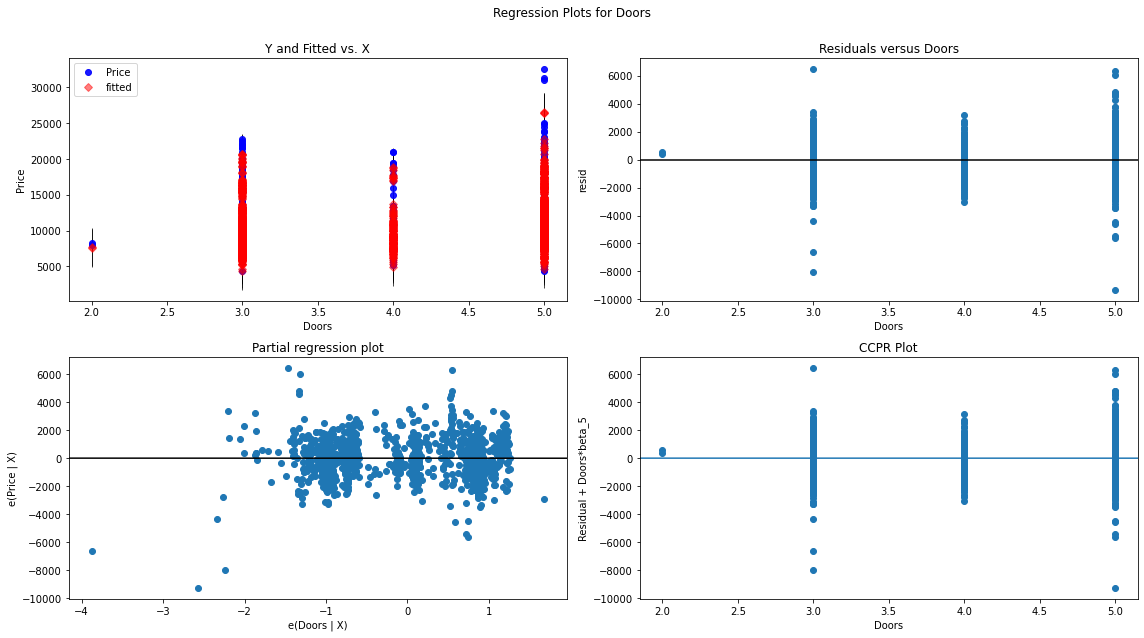

In [72]:
fig=plt.figure(figsize=(16,9))
sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

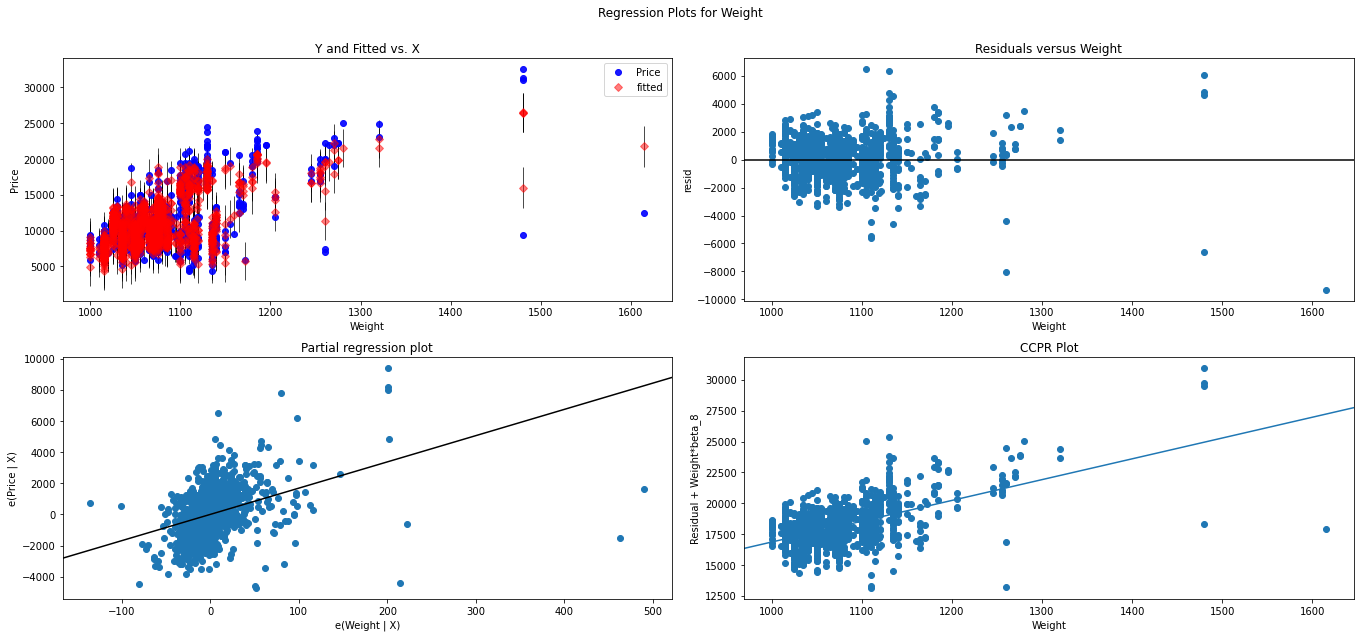

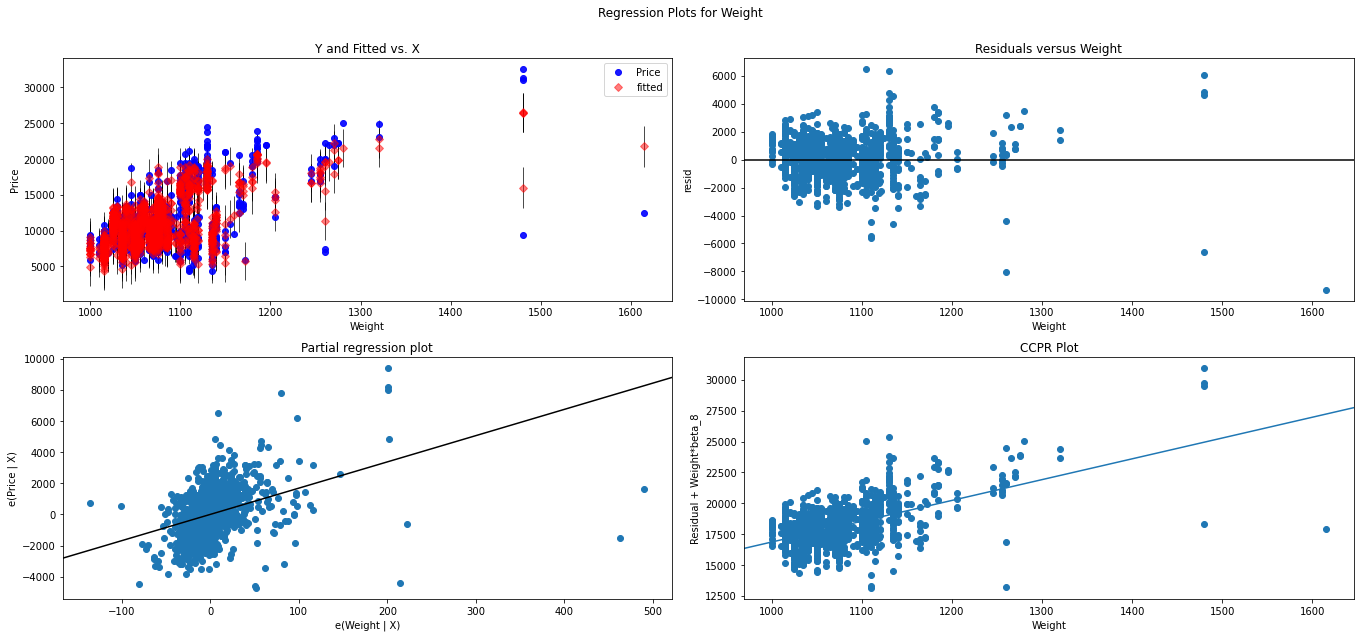

In [73]:
fig=plt.figure(figsize=(19,9))
sm.graphics.plot_regress_exog(model,'Weight',fig=fig)

# Model Deletion Diagnostics(checking Outlier OR Influencers

In [74]:
# cooks Distance, if cooks distance >1 then its outlier

In [75]:
(c,_)=model.get_influence().cooks_distance

In [76]:
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110550e-07, 6.99854767e-04, 1.08408002e-02])

In [77]:
import numpy as np

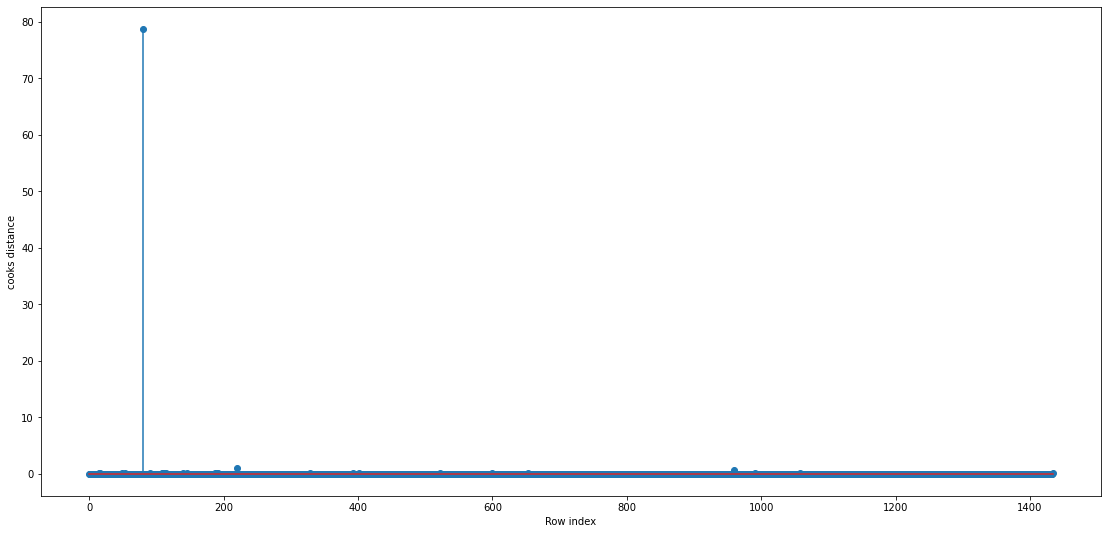

In [78]:
# plot influence plot using stem plot
fig=plt.figure(figsize=(19,9))
plt.stem(np.arange(len(toyota3)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()

In [79]:
np.argmax(c),np.max(c) #bindex and value using high influence point

(80, 78.7295058224984)

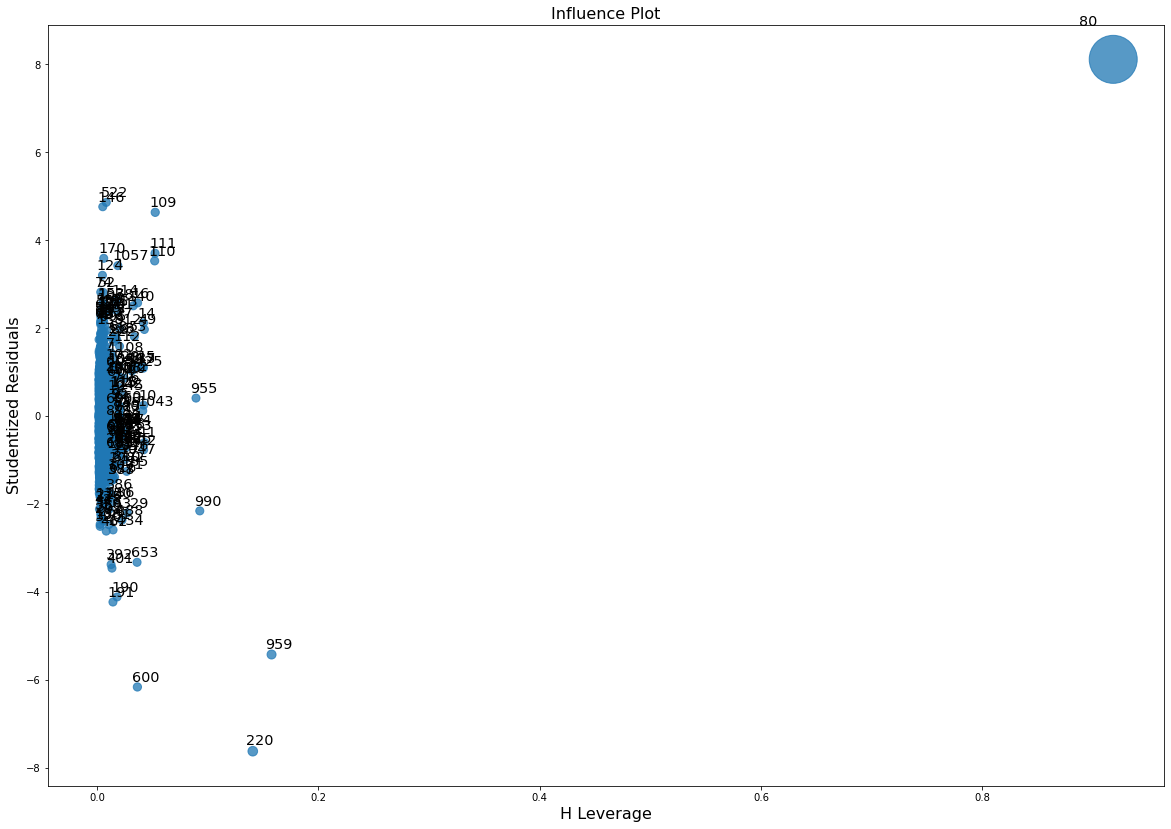

In [80]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
from statsmodels.graphics.regressionplots import influence_plot
fig,ax=plt.subplots(figsize=(20,14))

fig=influence_plot(model,ax = ax)

In [81]:
toyota3[toyota3.index.isin([80])]

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
80,18950,25,20019,110,16000,5,5,100,1180


In [82]:
# creating a copy
toyota4=toyota3.copy()
toyota4

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [83]:
toyota_final=toyota4.drop(toyota4.index[80],axis=0).reset_index(drop=True)

In [84]:
toyota_final

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [85]:
model_f=smf.ols('Price~Age+KM+cc+Doors+Gears+Tax+HP+Weight',data=toyota_final).fit()

In [86]:
model_f

In [87]:
model_f.rsquared

0.8681163912634053

In [88]:
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model_f.get_influence()
(c, _) = model_influence.cooks_distance


In [89]:
c

array([6.74590070e-03, 3.61405392e-03, 4.90156911e-03, ...,
       3.65590981e-06, 9.10404094e-04, 9.70018332e-03])

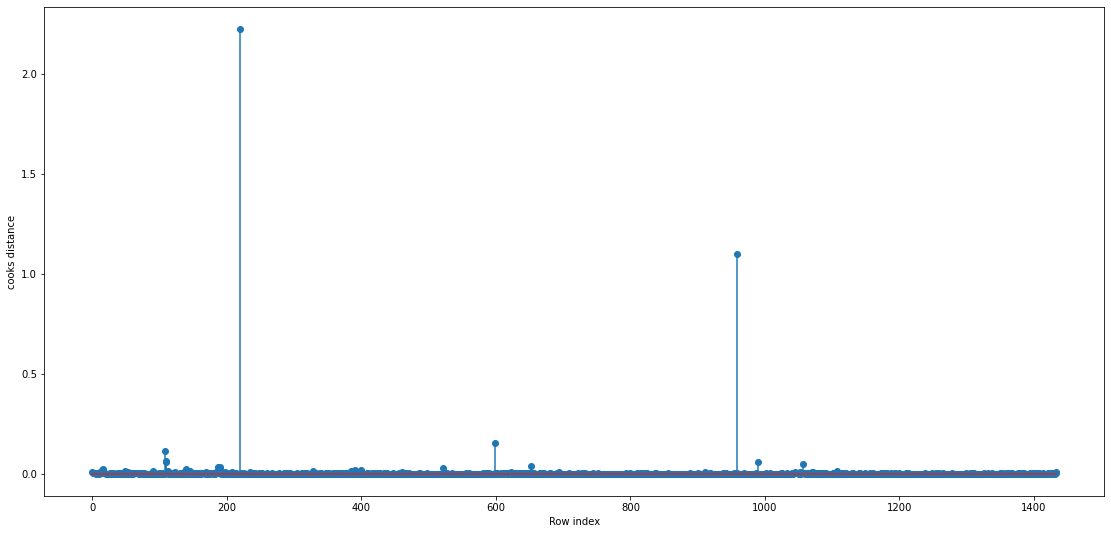

In [90]:
fig=plt.figure(figsize=(19,9))
plt.stem(np.arange(len(toyota_final)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('cooks distance')
plt.show()


In [91]:
np.argmax(c),np.max(c)

(219, 2.225351365527498)

In [92]:
toyota_final1=toyota_final.drop(toyota_final.index[219],axis=0).reset_index(drop=True)

In [93]:
toyota_final1

,Price,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1428,7500,69,20544,86,1300,3,5,69,1025
1429,10845,72,19000,86,1300,3,5,69,1015
1430,8500,71,17016,86,1300,3,5,69,1015
1431,7250,70,16916,86,1300,3,5,69,1015


In [94]:
final_model=smf.ols("Price~Age+HP+KM+cc+Doors+Gears+Tax+Weight",data=toyota_final1).fit()

In [95]:
final_model.rsquared

0.8765926307402282

In [96]:
# prediction model
new_data=pd.DataFrame({'Age':20,'KM':25,'HP':200,'cc':3456,'Doors':2435,'Gears':5555,'Tax':4500,'Weight':5000},index=[0])

In [97]:
new_data

,Age,KM,HP,cc,Doors,Gears,Tax,Weight
0,20,25,200,3456,2435,5555,4500,5000


In [98]:
final_model.predict(new_data)

0    2.694718e+06
dtype: float64